Olympic Dataset day 

Un ensemble de données sur les biographies des athlètes olympiques au cours des 100 dernières années.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

xl = pd.ExcelFile('./data/olympics-data.xlsx')
bios_df = pd.read_excel(xl, sheet_name='bios')
bios_df

Chaque fois que nous travaillons avec un nouvel ensemble de données, nous devons en avoir une première idée en utilisant head(), info() et describe().

In [ ]:
bios_df.head(10)

In [ ]:
bios_df.info()

In [ ]:
bios_df.describe()

##### Traitement de données manquantes

Les données manquantes (numpy.nan) sont un problème récurrent dans l'analyse des données. Elles peuvent provenir de diverses raisons telles que des erreurs de saisie, des mesures non enregistrées ou des informations non fournies. 

1) Detection

Avant de commencer l'analyse d'un ensemble de données, il convient de s'occuper en priorité des valeurs manquantes.

In [ ]:
bios_df.isna().sum()

Suppression des valeurs manquantes

In [ ]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]], columns=['A', 'B', 'C'])
df

In [ ]:
#### en utilisant de supression et des axes differentes
df.dropna()

Imputation des valeurs manquantes avec **fillna()**

In [8]:
df.fillna(3, inplace = True)

In [ ]:
df

La méthode **interpolate()** de pandas est utilisée pour combler les valeurs manquantes dans une série ou un DataFrame en effectuant une interpolation. Elle permet d'estimer les valeurs intermédiaires en fonction des données existantes

In [ ]:
df.interpolate(method = 'linear')

In [ ]:
bios_df.head(5)

In [ ]:
#### Traitement des valeurs manquantes dans notre ensemble de données
bios_df['died_date'].fillna('Still Alive', inplace = True)

In [ ]:
bios_df

In [ ]:
bios_df.isna().sum()

Exercise

En utilisant les méthodes apprises ci-dessus, complétez les valeurs manquantes pour les colonnes poids et taille. 

##### Les valeurs textuelles dans Pandas :
Pandas permet plusieurs opérations pour rechercher, filtrer et manipuler des colonnes contenant des chaînes de caractères (str).

**contains()** : Filtrer les valeurs contenant un texte spécifique
Permet de rechercher partout dans la chaîne.

In [16]:
bios_df['born_city'][:10]

0             Bordeaux
1               Meulan
2             Biarritz
3          Paris VIIIe
4           Wandsworth
5               Amiens
6          Ris-Orangis
7         Villeurbanne
8                Nîmes
9    Farges-Allichamps
Name: born_city, dtype: object

In [28]:
#### filtrer toutes les valeurs de la colonne « born_city » si elles contiennent l'expression « Gen ».
bios_df.loc[bios_df['born_city'].str.contains('Gen', na = False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
506,508,Doris Haas,1964-12-27,Gengenbach,Baden-Württemberg,GER,West Germany,165.0,59.0,Still Alive
743,747,Jaimie Dawson,1969-07-28,Genève (Geneva),Genève,SUI,Canada,181.0,79.0,Still Alive
2350,2360,Pernille Dupont Jensen,1967-10-06,Gentofte,Hovedstaden,DEN,Denmark,NaN,NaN,Still Alive
2384,2394,Michael Tauson,1966-06-25,Gentofte,Hovedstaden,DEN,Denmark,193.0,83.0,Still Alive
2561,2573,Maurice Ferrier,1901-11-08,Genève (Geneva),Genève,SUI,Switzerland,NaN,NaN,1973-09-09
...,...,...,...,...,...,...,...,...,...,...
144558,148250,Oliver Lauridsen,1989-03-24,Gentofte,Hovedstaden,DEN,Denmark,198.0,108.0,Still Alive
144565,148257,Patrick Russell,1993-01-04,Gentofte,Hovedstaden,DEN,Denmark,186.0,93.0,Still Alive
144566,148258,Frederik Storm,1989-02-20,Gentofte,Hovedstaden,DEN,Denmark,180.0,NaN,Still Alive
144598,148290,Matthias Versluis,1994-07-18,Genolier,Vaud,SUI,Finland,NaN,NaN,Still Alive


**endswith()** : Filtrer les valeurs qui se terminent par un certain texte

In [31]:
bios_df.loc[bios_df['name'].str.endswith('ov', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
358,359,Ivan Ivanov,1956-06-10,NaN,NaN,NaN,Bulgaria,NaN,NaN,Still Alive
360,361,Stefan Mlyakov,1971-09-22,Gabrovo,Gabrovo,BUL,Bulgaria,183.0,80.0,Still Alive
379,380,Rob Rusnov,1973-12-09,Toronto,Ontario,CAN,Canada,180.0,89.0,Still Alive
722,726,Yasen Borisov,1962-06-02,NaN,NaN,NaN,Bulgaria,179.0,68.0,Still Alive
724,728,Ivan Ivanov,1966-02-19,NaN,NaN,NaN,Bulgaria,179.0,71.0,Still Alive
...,...,...,...,...,...,...,...,...,...,...
145147,148864,Pavel Kulizhnikov,1994-04-20,Vorkuta,Respublika Komi,RUS,ROC,NaN,NaN,Still Alive
145148,148865,Ruslan Murashov,1992-12-29,Voskresensk,Moskva Oblast,RUS,ROC,NaN,NaN,Still Alive
145149,148866,Viktor Mushtakov,1996-12-19,Barnaul,Altay Kray,RUS,ROC,NaN,NaN,Still Alive
145285,149006,Nikolaj Majorov,2000-08-18,Luleå,Norrbotten,SWE,Sweden,NaN,NaN,Still Alive


**startswith()** : Filtrer les valeurs qui commencent par un certain texte
Permet de sélectionner uniquement les valeurs d’une colonne qui commencent par un préfixe spécifique.

In [32]:
#### tribute to Shaquille O'Neal
bios_df.loc[bios_df['name'].str.startswith('Shaq', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
6722,6755,Shaquille O'Neal,1972-03-06,Newark,New Jersey,USA,United States,216.0,137.0,Still Alive
143978,147636,Shaquille Moosa,2002-04-10,NaN,NaN,NaN,Zambia,NaN,NaN,Still Alive


In [ ]:
df3 = bios_df.loc[bios_df['name'].str.startswith('Stefano', na=False)]
df3

Exercise: 

Trouver les athlètes ayant le même prénom que vous

Ensuite, créez un histogramme qui affiche la répartition des pays (NOC) des athlètes trouvés.


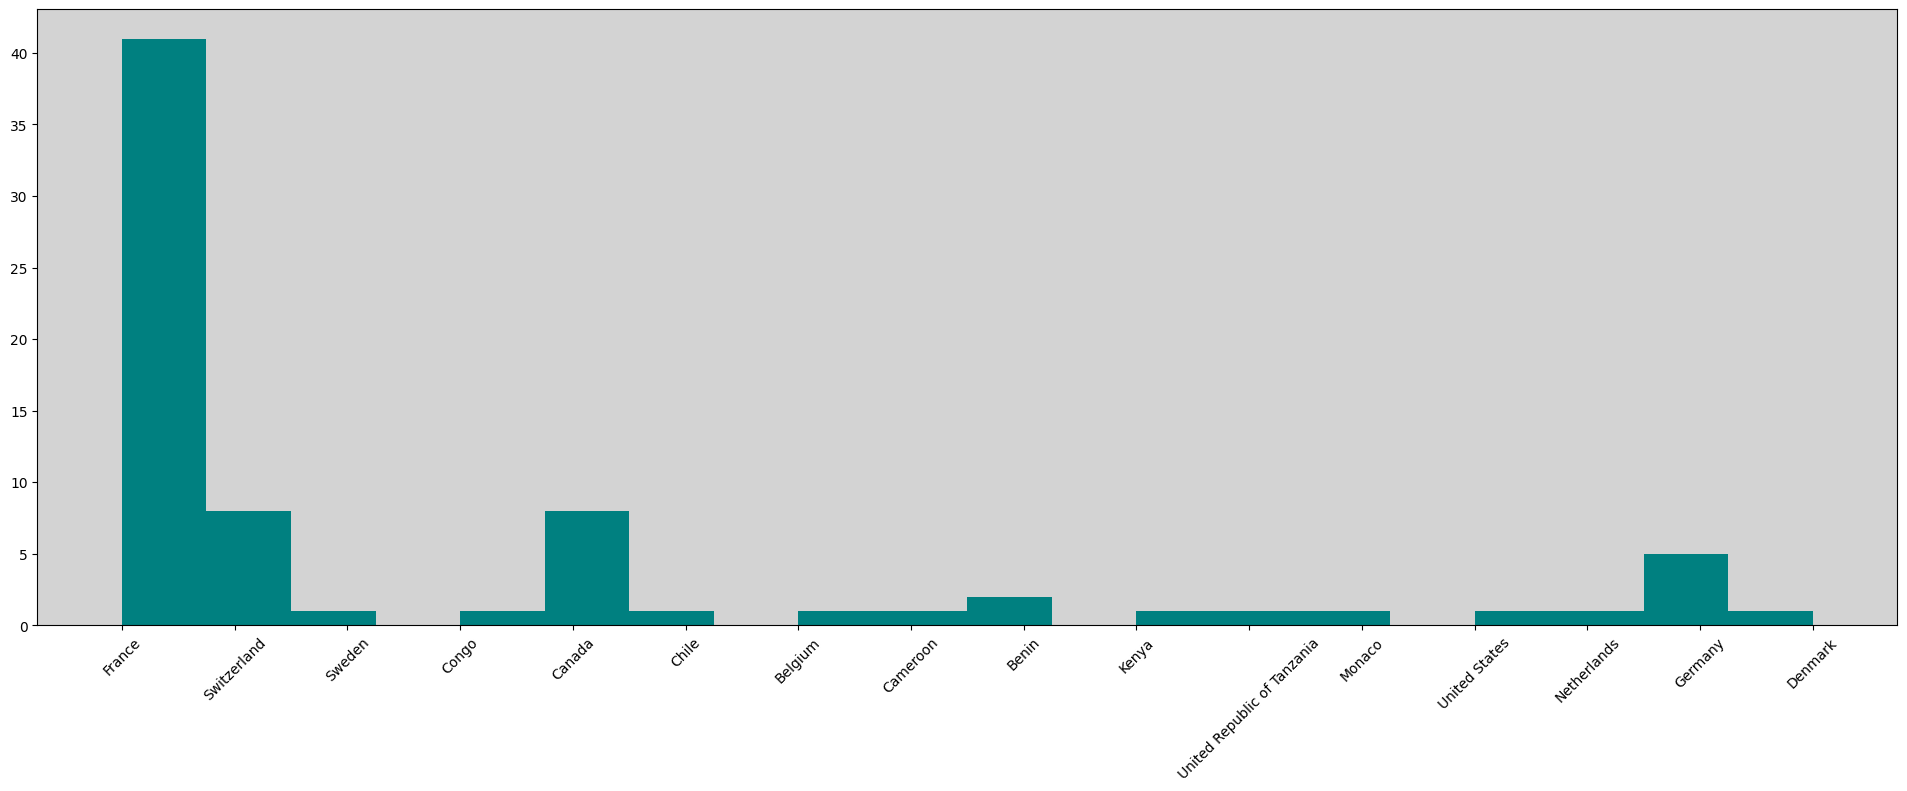

In [45]:
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.figure(figsize = (24, 8))
names = bios_df.loc[bios_df['name'].str.startswith('Pascal', na=False)]
names['NOC'].hist(bins = 20, color = 'teal')
plt.xticks(rotation = 45)
plt.grid(False)
plt.show()

##### Séries Chronologiques
En utilisant le NumPy **datetime64**, pandas contient des capacités et des fonctionnalités étendues pour travailler avec des données de séries temporelles dans tous les domaines. 
Les séries chronologiques sont des ensembles de données indexées par le temps. Elles sont essentielles pour l'analyse des tendances, des prédictions et des modèles temporels.

In [50]:
bios_df['born_date'][0]

'1886-12-12'

In [57]:
#### la conversion entre str et datetime
new_datetime = pd.to_datetime(bios_df['born_date'][3])
new_datetime

Timestamp('1895-05-11 00:00:00')

In [58]:
bios_df

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,Still Alive
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,Still Alive
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,Still Alive
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,Still Alive
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


Dans notre dataset, nous avons deux colonnes contenant des dates sous forme de chaînes de caractères (born_date, died_date). Nous devons les convertir en datetime pour une meilleure manipulation :

In [59]:
bios_df["born_date"] = pd.to_datetime(bios_df["born_date"], errors='coerce', exact = False)
bios_df["died_date"] = pd.to_datetime(bios_df["died_date"], errors='coerce', exact = False)

In [61]:
bios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64         
 1   name          145500 non-null  object        
 2   born_date     143693 non-null  datetime64[ns]
 3   born_city     110908 non-null  object        
 4   born_region   110908 non-null  object        
 5   born_country  110908 non-null  object        
 6   NOC           145499 non-null  object        
 7   height_cm     106651 non-null  float64       
 8   weight_kg     102070 non-null  float64       
 9   died_date     33940 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 11.1+ MB


In [62]:
bios_df['born_date'].dt.year.dropna()

0         1886.0
1         1969.0
2         1898.0
3         1895.0
4         1878.0
           ...  
145495    2002.0
145496    1999.0
145497    1998.0
145498    1899.0
145499    1913.0
Name: born_date, Length: 143693, dtype: float64

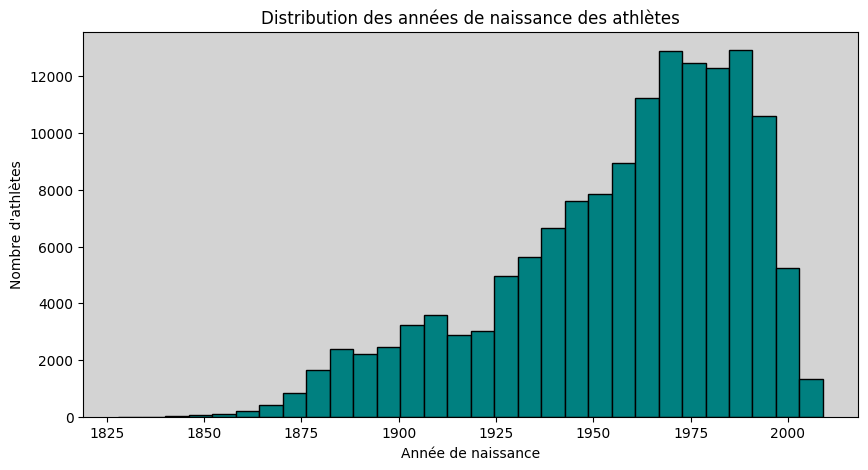

In [64]:
#### Histogramme des Années de Naissance
all_years = bios_df["born_date"].dt.year.dropna().astype(int)

plt.figure(figsize = (10,5))
plt.hist(all_years, bins = 30, color = 'teal', edgecolor = 'black')
plt.xlabel("Année de naissance")
plt.ylabel("Nombre d'athlètes")
plt.title("Distribution des années de naissance des athlètes")
plt.show()

In [70]:
bios_df.dropna(subset = ['born_date'], inplace = True) ##### supprime uniquement les lignes où la colonne born_date contient une valeur manquante (NaN).
bios_df.sort_values(by = ['born_date']) ### Note: Le tri n'est pas appliqué directement au DataFrame, car inplace=True n’a pas été précisé.

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
62451,62914,William Martin,1828-10-25,Rouen,Seine-Maritime,FRA,France,NaN,NaN,1905-02-25
63109,63579,Ferdinand de Schlatter,1831-02-14,Paris IVe,Paris,FRA,France,NaN,NaN,1907-07-04
11836,11898,"Louis, Comte du Douet de Graville",1831-02-27,Bernières,Seine-Maritime,FRA,France,NaN,NaN,1912-10-12
2235,2245,Thomas Scott,1833-01-03,Warren,Ohio,USA,United States,NaN,NaN,1911-06-23
2220,2230,Samuel Duvall,1836-03-11,Liberty,Indiana,USA,United States,NaN,NaN,1908-09-26
...,...,...,...,...,...,...,...,...,...,...
140904,144433,Momiji Nishiya,2007-08-30,NaN,NaN,NaN,Japan,NaN,NaN,NaT
137792,141168,Rayssa Leal,2008-01-04,Imperatriz,Maranhão,BRA,Brazil,147.0,35.0,NaT
139592,143068,Sky Brown,2008-07-07,Miyazaki,Miyazaki,JPN,Great Britain,NaN,NaN,NaT
140902,144431,Kokona Hiraki,2008-08-26,NaN,NaN,NaN,Japan,NaN,NaN,NaT


Visualisation des principales nationalités de tous les athlètes sur notre ligne temporelle

In [76]:
x = bios_df['NOC'].loc[(bios_df['born_date'].dt.year > 1900) & (bios_df['born_date'].dt.year < 1900 + 25)].value_counts()[:10]
x

NOC
United States    1177
Great Britain     785
France            739
Germany           695
Italy             660
Sweden            588
Switzerland       508
Canada            425
Hungary           420
Netherlands       417
Name: count, dtype: int64

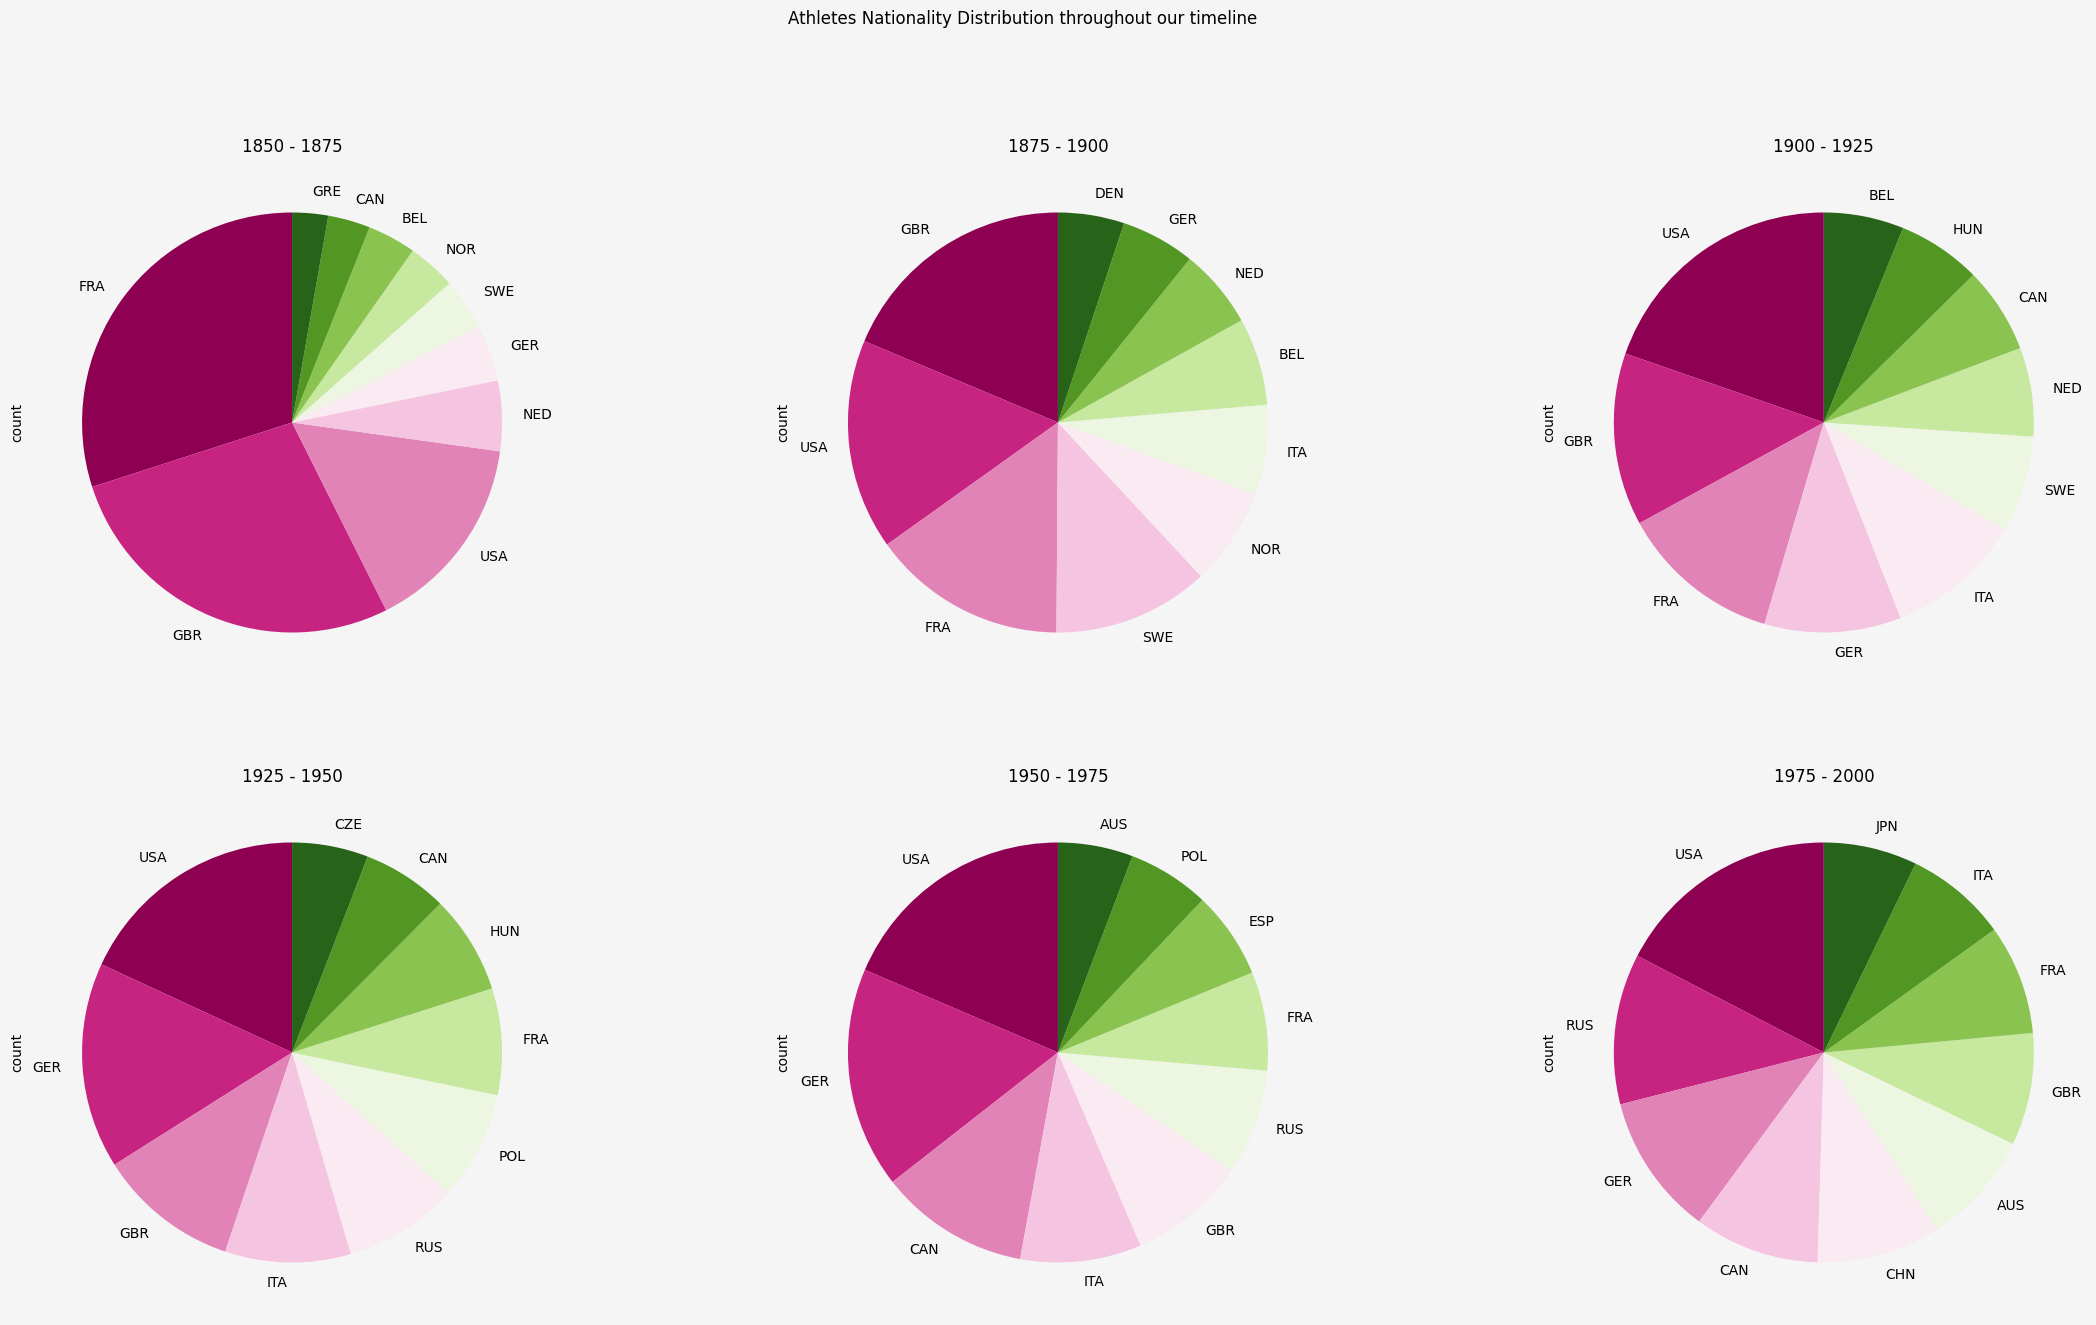

In [84]:
current_year = 1850
fig, axes = plt.subplots(2, 3, figsize = (28, 15))
fig.patch.set_facecolor('whitesmoke')

plt.suptitle('Athletes Nationality Distribution throughout our timeline')

for i, ax in enumerate(axes.flatten()):
    x = bios_df['born_country'].loc[(bios_df['born_date'].dt.year > current_year) & (bios_df['born_date'].dt.year < current_year + 25)].value_counts()[:10]
    x.plot(kind = 'pie', startangle = 90, colormap = 'PiYG', ax = ax)
    ax.set_title('{} - {}'.format(current_year, current_year + 25))
    current_year = current_year + 25
plt.show()

Exercise

1) Ajoutez une nouvelle colonne booléenne nommée **'born_after_2000'**, qui indique **True** si un athlète est né après l'année 2000 et **False** dans le cas contraire. 
2) Affichez un PieChart de la répartition des pays entre 2000 et l'année la plus récente de l'ensemble de données.

In [ ]:
# countries = ['Albania', 'France', 'Switzerland', 'United States']
new_df = df['NOC'].loc[(df['height_cm'] > 200.0)]
new_df

In [ ]:
bios_df[['name', 'NOC']].loc[bios_df['name'].values.startswith('Nikita')]

In [ ]:
new_df.value_counts()

##### Manipulation Avancée des Données avec Pandas : Group By, Merge, Join et Concat

Lors du traitement des données tabulaires, il est souvent nécessaire d’agréger, fusionner ou concaténer des DataFrames.

**groupby()** : Regrouper et Aggréger les Données

Le groupby permet de regrouper les données en fonction d'une ou plusieurs colonnes et d'appliquer des opérations d'agrégation (somme, moyenne, comptage, etc.).

In [ ]:
data = {"Athlete": ["A", "B", "A", "C", "B"],
        "Discipline": ["Natation", "Athlétisme", "Natation", "Cyclisme", "Athlétisme"],
        "Medals": [1, 2, 3, 1, 4],
        'Max Speed': [380., 370., 240., 260., 180.]}
df = pd.DataFrame(data)
print(df)
# Regrouper par athlète et calculer le total des médailles
medals_per_athlete = df.groupby("Athlete")["Medals"].sum()
print(medals_per_athlete)

In [ ]:
df.groupby('Discipline')['Max Speed'].mean()

In [ ]:
#### Exemple dans notre dataset
athletes_per_country = bios_df.groupby("NOC")["athlete_id"].count()
print(athletes_per_country)

**merge()** : Fusionner des DataFrames

La méthode merge() permet de combiner deux DataFrames en fonction d'une clé commune, similaire à une jointure SQL.

In [ ]:
athletes = pd.DataFrame({"athlete_id": ['A1', 'A2', 'A3'], "name": ["Alice", "Bob", "Charlie"]})
medals = pd.DataFrame({"athlete_id": ['A1', 'A2', 'A3'], "gold_medals": [2, 0, 1]})
athletes

In [ ]:
medals

In [ ]:
#### Fusion sur la colonne 'athlete_id'
merged_df = pd.merge(athletes, medals, on="athlete_id")
merged_df

**join()** : Fusionner sur l’Index

Contrairement à merge(), la méthode join() fonctionne sur les index des DataFrames.

In [ ]:
first_df = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
print('First DF: {}\n'.format(first_df))
other = pd.DataFrame({'key2': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
print('Second DF: {}\n'.format(other))

joined_df = first_df.join(other)
joined_df

**concat()** : Concaténation de DataFrames

La fonction concat() permet d'assembler plusieurs DataFrames soit en ligne (axis=0), soit en colonne (axis=1).

In [ ]:
part1 = pd.DataFrame({"athlete_id": [1, 2], "name": ["Alice", "Bob"]})
part2 = pd.DataFrame({"athlete_id": [3, 4], "name": ["Charlie", "David"]})

print('First DF: {}\n'.format(part1))
print('Second DF: {}\n'.format(part2))

#### Concaténation verticale
concatenated_df = pd.concat([part1, part2], axis=0)
concatenated_df

Exercise

Revenons à notre ensemble de données :

1) Imprimez une concaténation de tous les athlètes jouant pour la France ou la Suisse.
2) Regroupez chaque athlète par ville de naissance et calculez la moyenne taille/ville.